In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install kneed
!pip install xlrd

In [2]:
df = pd.read_excel(io="Property Dataset - Clustering.xlsx",sheet_name='Data Rumah')
df.head(15)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000.0,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999.0,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000.0,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000.0,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530.0,5.0,6.0,2.0,10800000000.0,Belum,NaN,Standard,1-2 Mobil
6,Below Standard,Gubeng,96.0,60.0,2.0,1.0,1.0,390000000.0,Belum,NaN,Standard,1-2 Mobil
7,Premium,Gubeng,85.0,100.0,3.0,2.0,2.0,725000000.0,Belum,NaN,Standard,1-2 Mobil
8,Below Standard,Sawahan,72.0,120.0,4.0,1.0,1.0,775000000.0,Belum,Barat,Tikungan/Hook,< 1 Mobil
9,Standard,Gubeng,50.0,100.0,2.0,2.0,2.0,850000000.0,Belum,NaN,Standard,1-2 Mobil


In [3]:
df.drop(0, inplace = True)
#menghaus row kosong

In [4]:
#melihat apakah ada missing values
df.isnull().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 1
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  82
Posisi Rumah                     115
Lebar Jalan Depan Rumah (ROW)     41
dtype: int64

In [5]:
#mengisi missing values
df.interpolate(method ='linear', limit_direction ='forward', inplace = True)

In [6]:
df.interpolate(method ='linear', limit_direction ='backward', inplace = True)

In [7]:
for i in df.columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [8]:
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [9]:
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000.0,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999.0,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000.0,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000.0,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530.0,5.0,6.0,2.0,10800000000.0,Belum,Utara,Standard,1-2 Mobil


In [10]:
#melakukan label encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Area Category'] = lb.fit_transform(df['Area Category'])
df['Nama Daerah'] = lb.fit_transform(df['Nama Daerah'])
df['Terjual/Belum'] = lb.fit_transform(df['Terjual/Belum'])
df['Arah Hadap Rumah'] = lb.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = lb.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah (ROW)'] = lb.fit_transform(df['Lebar Jalan Depan Rumah (ROW)'])
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,100,30.0,60.0,2.0,1.0,2.0,287799000.0,0,3,2,1
2,3,48,170.0,170.0,5.0,4.0,2.0,2699999999.0,0,1,0,0
3,2,48,187.0,250.0,5.0,5.0,2.0,3100000000.0,0,3,2,0
4,1,48,350.0,600.0,5.0,5.0,2.0,5000000000.0,0,0,2,0
5,1,48,450.0,530.0,5.0,6.0,2.0,10800000000.0,0,3,2,0


In [11]:
df.drop(df[df['Harga Penawaran (dari Owner)'] == ' '].index, inplace = True)
#menghapus value agar dapat di scaling.

In [12]:
dfsummary = pd.DataFrame()
dfsummary2 = pd.DataFrame()

dfsummary = df.copy()
dfsummary2 = df.copy()

In [13]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df))
df.rename(columns = {0:'Area Category', 1:'Nama Daerah', 2:'Luas Tanah (m2)', 3:'Luas Bangunan (m2)', 4:'Jumlah Kamar', 5:'Jumlah Kamar Mandi', 6:'Tingkat/Lantai', 7:'Harga Penawaran (dari Owner)', 8:'Terjual/Belum', 9:'Arah Hadap Rumah', 10:'Posisi Rumah', 11:'Lebar Jalan Depan Rumah (ROW)'}, inplace = True)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,-1.671343,1.044023,-0.974919,-0.968013,-1.381932,-1.432632,0.280917,-0.566622,0.0,0.840004,-0.188704,0.222382
1,1.010987,-0.368844,-0.282302,-0.452780,0.440789,0.410614,0.280917,-0.276647,0.0,-1.137237,-5.438105,-0.824526
2,0.116877,-0.368844,-0.198198,-0.078066,0.440789,1.025030,0.280917,-0.228562,0.0,0.840004,-0.188704,-0.824526
3,-0.777233,-0.368844,0.608207,1.561311,0.440789,1.025030,0.280917,-0.000159,0.0,-2.125857,-0.188704,-0.824526
4,-0.777233,-0.368844,1.102934,1.233436,0.440789,1.639445,0.280917,0.697071,0.0,0.840004,-0.188704,-0.824526


In [14]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [15]:
# using kneelocator to find the elbow/knee

from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

print("The best K for your model is",kl.elbow)

The best K for your model is 3


In [16]:
kmeans = KMeans(init="random",n_clusters=3,max_iter=300,random_state=42)

pred = kmeans.fit_predict(df)
# pred = kmeans.fit(df)
pred

array([2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1,
       2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 2,
       2, 0, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       0, 2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2,

In [17]:
from sklearn.cluster import AgglomerativeClustering # this line of code imports AgglomerativeClustering model from sk-learn
Agg_hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc = Agg_hc.fit_predict(df) # model fitting on the dataset

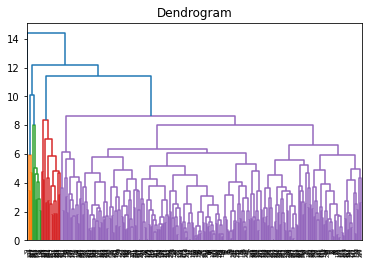

In [18]:
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method = 'complete')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') # title of the dendrogram
plt.show() # show the dendrogram
#complete

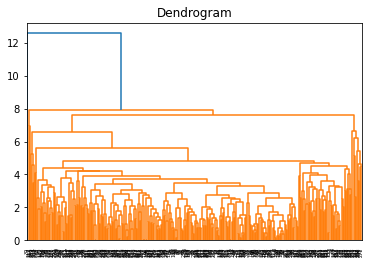

In [19]:
Agg_hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_hc = Agg_hc.fit_predict(df) # model fitting on the dataset
dendrogram = sch.dendrogram(sch.linkage(df, method = 'average')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') # title of the dendrogram
plt.show() # show the dendrogram
#average

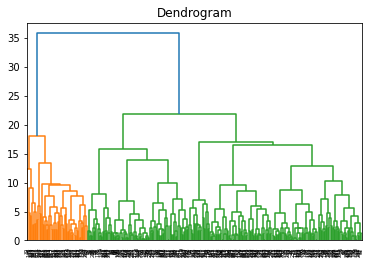

In [20]:
Agg_hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = Agg_hc.fit_predict(df) # model fitting on the dataset
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') # title of the dendrogram
plt.show() # show the dendrogram
#ward

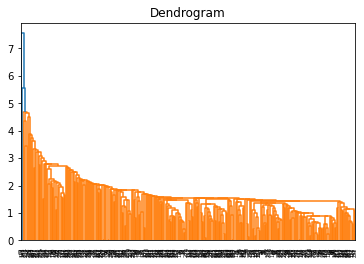

In [21]:
Agg_hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
y_hc = Agg_hc.fit_predict(df) # model fitting on the dataset
dendrogram = sch.dendrogram(sch.linkage(df, method = 'single')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') # title of the dendrogram
plt.show() # show the dendrogram
#single